# Titanic - Exploratory data analysis (trial 2)

<b>Problem</b>: find correlations between different attributes and code up an algorithm that accurately predicts the surviving passengers</br>
<b>Solution</b>: working on it (should apply different regression models and machine learning algorithms)


<b>Output: </b> a csv file with two columns: 'PassengerId' and 'survived'


In [89]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


In [90]:
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.simplefilter(action='ignore')


# Function inventory (last updated: 5/30/2024)




In [91]:
"""plot_entropy function: brought to you by chatgpt"""

def plot_entropy(data):
    try:
        # Step 1: Ensure data is a numpy array
        data = np.array(data)
        print("Data:", data)
        
        # Step 2: Calculate probabilities
        values, counts = np.unique(data, return_counts=True)
        probabilities = counts / len(data)
        print("Probabilities:", probabilities)
        
        # Step 3: Calculate entropy
        entropy = -np.sum(probabilities * np.log2(probabilities))
        print("Entropy:", entropy)
        
        # Step 4: Plotting entropy
        plt.figure(figsize=(10, 6))
        plt.bar(values, probabilities, color='skyblue')
        plt.xlabel('Values')
        plt.ylabel('Probabilities')
        plt.title(f'Entropy: {entropy:.4f}')
        plt.show()
    
    except Exception as e:
        print("An error occurred:", e)


# some surface level analyses and graphs



In [151]:
train_data = pd.read_csv('/Users/annikaseo-yeonkim/Desktop/MongooseAI/1주차/titanic/datasets/train (1).csv')
test_data = pd.read_csv('/Users/annikaseo-yeonkim/Desktop/MongooseAI/1주차/titanic/datasets/test.csv')
# train_data = pd.concat([train_data,test_data],axis = 0).reset_index(drop = False)
# print(train_data['PassengerId'].count())
train_data.info()
print(train_data['Survived'].isnull().sum())
# train_data.drop(['Name','Embarked'],axis = 1)
# plot_entropy(train_data['Age'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
0


In [93]:
median_age_by_pclass = train_data.groupby('Pclass')['Age'].median()
# print(median_age_by_pclass)

def fill_age(row):
    if pd.isnull(row['Age']):
        return median_age_by_pclass[row['Pclass']]
    else:
        return row['Age']
    
train_data['Age'] = train_data.apply(fill_age, axis=1)


In [94]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# logistic regression



In [95]:
# Convert categorical variables to numerical (example using one-hot encoding)
categorical_cols = ['Sex', 'Embarked']  # Replace with your categorical columns
data = pd.get_dummies(train_data, columns=categorical_cols, drop_first=True)

# Define features and target
X = data.drop('Survived', axis=1)  # Replace 'Survived' with your target column
y = data['Survived']

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [97]:

X = train_data['Age']
print(X)
y = train_data['Survived']
model = LogisticRegression()
rfe = RFE(8)
# rfe = RFE.fit(X, y)
# # summarize the selection of the attributes
# print('Selected features: %s' % list(X.columns[rfe.support_]))



0      22.00
1      38.00
2      26.00
3      35.00
4      35.00
5      24.00
6      54.00
7       2.00
8      27.00
9      14.00
10      4.00
11     58.00
12     20.00
13     39.00
14     14.00
15     55.00
16      2.00
17     29.00
18     31.00
19     24.00
20     35.00
21     34.00
22     15.00
23     28.00
24      8.00
25     38.00
26     24.00
27     19.00
28     24.00
29     24.00
30     40.00
31     37.00
32     24.00
33     66.00
34     28.00
35     42.00
36     24.00
37     21.00
38     18.00
39     14.00
40     40.00
41     27.00
42     24.00
43      3.00
44     19.00
45     24.00
46     24.00
47     24.00
48     24.00
49     18.00
50      7.00
51     21.00
52     49.00
53     29.00
54     65.00
55     37.00
56     21.00
57     28.50
58      5.00
59     11.00
60     22.00
61     38.00
62     45.00
63      4.00
64     37.00
65     24.00
66     29.00
67     19.00
68     17.00
69     26.00
70     32.00
71     16.00
72     21.00
73     26.00
74     32.00
75     25.00
76     24.00

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #split the dataset into training and test sets
print(X_train)


331    45.50
733    23.00
382    32.00
704    26.00
813     6.00
118    24.00
536    45.00
361    29.00
29     24.00
55     37.00
865    42.00
595    36.00
239    33.00
721    17.00
81     29.00
259    50.00
486    35.00
716    38.00
800    34.00
781    17.00
542    11.00
326    61.00
534    30.00
535     7.00
483    63.00
762    20.00
533    24.00
713    29.00
390    36.00
495    24.00
482    50.00
377    27.00
365    30.00
412    33.00
468    24.00
409    24.00
7       2.00
580    25.00
155    51.00
880    25.00
425    24.00
101    24.00
199    24.00
424    18.00
298    37.00
884    25.00
247    24.00
478    22.00
305     0.92
316    24.00
2      26.00
405    34.00
742    21.00
260    24.00
367    24.00
158    24.00
554    22.00
829    62.00
677    18.00
380    42.00
626    57.00
302    19.00
432    42.00
522    24.00
404    20.00
843    34.50
355    28.00
464    24.00
753    23.00
212    22.00
449    52.00
79     30.00
148    36.50
428    24.00
60     22.00
660    50.00
804    27.00

In [99]:
# Identify numeric and categorical columns
numeric_features = ['Age', 'Fare', 'Parch', 'SibSp']  # Add other numeric features if necessary
categorical_features = ['Sex_male', 'Embarked_Q', 'Pclass']  # Add other categorical features if necessary

# Define preprocessor for numeric features (impute missing values and scale)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Define preprocessor for categorical features (impute missing values and one-hot encode)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessors into a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the logistic regression model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [100]:
# model.fit(X_train, y_train)


In [101]:
train_data['Deck'] = train_data['Cabin'].str.slice(0,1)
deck_distribution = train_data['Deck'].value_counts(dropna = False)
clean_distribution = train_data['Deck'].value_counts(dropna = True)

print(train_data.groupby('Deck')['Fare'].median())
# correlation_coefficient3 = train_data['Deck'].corr(train_data['Pclass'])
# print(train_data.groupby('Survived')['Age'].median())

print(train_data.groupby('Deck')['Pclass'].value_counts()) #Cabin C had the most 1st class passengers 

train_data['title'] = train_data.Name.str.extract('\, ([A-Z][^ ]*\.)',expand=False) #title deck

#print(train_data['Fare'].min()) # there are zero values in the dataset
#print((train_data.Fare == 0).sum()) # 17 zero values 
train_data.Fare = train_data.Fare.replace(0,np.NaN) # replace 0 with NaN
# print((train_data.Fare == 0).sum())

#now fill in the Fare column
train_data['Fare_clean'] = train_data.Fare.dropna()
#print(train_data['Fare_clean'])
correlation_coefficient3 = train_data['Fare_clean'].corr(train_data['Pclass']) #correlation_coefficient3 = -0.5694
median_fare_by_pclass = train_data.groupby('Pclass')['Fare'].median()
print(median_fare_by_pclass)


Deck
A    35.50000
B    80.00000
C    83.47500
D    53.10000
E    45.18125
F    13.00000
G    13.58125
T    35.50000
Name: Fare, dtype: float64
Deck  Pclass
A     1         15
B     1         47
C     1         59
D     1         29
      2          4
E     1         25
      2          4
      3          3
F     2          8
      3          5
G     3          4
T     1          1
Name: count, dtype: int64
Pclass
1    61.9792
2    15.0229
3     8.0500
Name: Fare, dtype: float64


In [152]:
def fill_fare(row):
    if pd.isnull(row['Fare']):
        return median_fare_by_pclass[row['Pclass']]
    else:
        return row['Fare']
    
train_data['Fare'] = train_data.apply(fill_fare, axis=1)
# fare_distribution = train_data['Fare'].value_counts(dropna = False)



In [103]:
# deck column
# train_data = train_data.dropna(subset=['Deck', 'Pclass'])

# Group by Cabin and calculate the distribution of Pclass
# cabin_pclass_distribution = train_data.groupby('Pclass')['Deck'].value_counts(normalize=True).unstack()

# Plot the distribution
# plt.figure(figsize=(12, 6))
# sns.heatmap(cabin_pclass_distribution, annot = True)
# plt.title('Distribution of Deck for each Pclass')
# plt.xlabel('Deck')
# plt.ylabel('Pclass')
# plt.show()

In [104]:
train_data['Deck'] = train_data.groupby('Pclass')['Deck'].transform(lambda x: x.fillna(x.mode().loc[0])) # used chatgpt
# print(sum(train_data['Deck'].isnull())) --> validated the results (the 'Deck' column is now filled)

In [105]:
print(train_data['Survived'].isnull().sum()) # missing 418 values in the 'Survived' column

0


In [106]:
sex_encoded = pd.get_dummies(train_data['Sex'], prefix='sex')

# Concatenate the original DataFrame with the new one-hot encoded variable
df_encoded = pd.concat([train_data, sex_encoded], axis=1)


        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363
Deck  Survived
A     0             8
      1             7
B     1            35
      0            12
C     1            54
      0            45
D     1            25
      0             8
E     1            24
      0             8
F     0           465
      1           195
G     0             2
      1             2
T     0             1
Name: count, dtype: int64


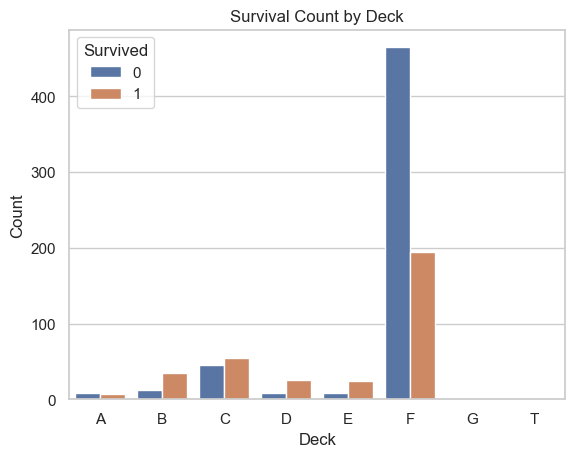

In [107]:
print(train_data[['Pclass','Survived']].groupby('Pclass').mean()) 
corr = train_data['Pclass'].corr(train_data['Survived']) # corr = -0.338
corr2 = train_data['Age'].corr(train_data['Survived']) # corr2 = -0.077 
corr3 = train_data['Fare'].corr(train_data['Survived']) # corr3 = 0.25
corr_sex_survived = df_encoded[['sex_male', 'sex_female']].corrwith(df_encoded['Survived']) #asked chatgpt and got sex_male = -0.54, sex_female = 0.54
print(train_data.groupby('Deck')['Survived'].value_counts())
# sns.barplot(train_data.groupby('Deck')['Survived']) 
# plt.show()

grouped_counts = train_data.groupby(['Deck', 'Survived']).size().reset_index(name='Count')

# Plot the grouped counts using seaborn #asked my good friend ChatGpt
sns.barplot(x='Deck', y='Count', hue='Survived', data=grouped_counts)
plt.title('Survival Count by Deck')
plt.xlabel('Deck')
plt.ylabel('Count')
plt.show()

In [108]:
# Deck F passengers mostly died, more females survived than males, 1st class passengers mostly survived --> will use these correlations to fill out the 'survived' column
sum =0
count_f = (train_data['Deck'] == "F").sum()

# Check if 'Deck' is "F" and 'Survived' is NaN
condition_met = (train_data['Deck'] == "F") & (train_data['Survived'].isna())

for index, row in train_data.iterrows():
    # Check if 'Deck' is "F" and 'Survived' is NaN for the current passenger 
    if row['Deck'] == "F" and pd.isna(row['Survived']) and row['Sex'] == "female":
        # If the condition is met, update 'Survived' to 1 for the current passenger
        train_data.at[index, 'Survived'] = 1

    if row['Sex'] == 'male' and row['Age'] < 40:
        train_data.at[index, 'Survived'] = 0 



In [109]:
for index, row in train_data.iterrows():
    # Check if 'Pclass' is 1 and 'Survived' is NaN for the current passenger 
    if pd.isna(row['Survived']) and row['Pclass'] == 1:
        # If the condition is met, update 'Survived' to 1 for the current passenger
        train_data.at[index, 'Survived'] = 1

# print(train_data['Survived'])
# print(train_data['Survived'].isnull().sum()) --> have three more cells to fill in

for index, row in train_data.iterrows():
    if pd.isna(row['Survived']):
        print(index,row)
        print()



In [110]:
import requests
import pandas as pd

# print(train_data['Survived'].isnull().sum()) - three passengers don't meet some but not all of the conditions listed above (shall deal with them on a case by case basis)
for index, row in train_data.iterrows():
    if "Sandstrom" in row['Name']: #Passenger Beatrice Irene Sandstrom -  mom and sister survived
        # print(row['Name'],row['PassengerId'])
        train_data.at[index, 'Survived'] = 1
    
        print(row['Name'],row['Survived'])
    
    if "Malachard" in row['Name']: #Noel Malachard: no siblings or spouse, 2nd class passenger, male, 29 y/o --> probably didn't survive
        # print(row['Name'],row['Survived'])
        train_data.at[index, 'Survived'] = 0

        print(row['Name'],row['Survived'])
    
    if "Nourney" in row['Name']: # Alfred Nourney: no siblings or spouse, 2nd class passenger, male, 20 y/o, cabin D  
        # print(row['Name'],row['Survived'])
        train_data.at[index, 'Survived'] = 0

        print(row['Name'],row['Survived'])
    

print(train_data['Survived'].isnull().sum())

# print(train_data['PassengerId'],train_data['Survived'])

survivors = pd.DataFrame({'PassengerId': train_data.PassengerId, 'Survived': train_data.Survived})
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(survivors)
print(train_data.Survived.isnull().sum())
survivors.to_csv('survivors_final.csv', index = False)

Sandstrom, Miss. Marguerite Rut 1
Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengtsson) 1
0
     PassengerId  Survived
0              1         0
1              2         1
2              3         1
3              4         1
4              5         0
5              6         0
6              7         0
7              8         0
8              9         1
9             10         1
10            11         1
11            12         1
12            13         0
13            14         0
14            15         0
15            16         1
16            17         0
17            18         0
18            19         0
19            20         1
20            21         0
21            22         0
22            23         1
23            24         0
24            25         0
25            26         1
26            27         0
27            28         0
28            29         1
29            30         0
30            31         0
31            32         1
32            33   

# DECISION TREE - iris dataset (chatgpt)



In [111]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.datasets import load_iris  # Example dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

In [112]:
iris = load_iris()
X = iris.data
y = iris.target

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [114]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [115]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


['setosa', 'versicolor', 'virginica']


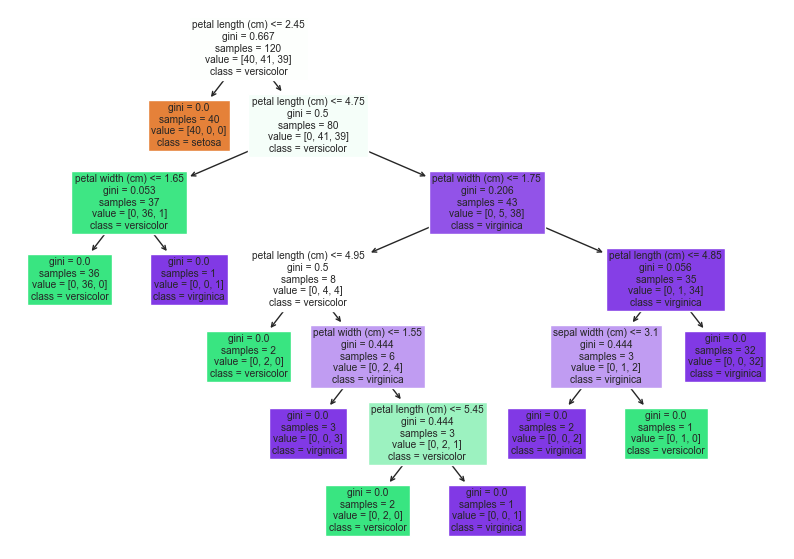

In [116]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Create and train a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
class_names_list = iris.target_names.tolist()
print(class_names_list)
# Visualize the decision tree
plt.figure(figsize=(10, 7))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=class_names_list)
plt.show()

# DECISION TREE - titanic dataset


In [117]:
# load datasets
X = data.drop('Survived', axis=1)  # Replace 'Survived' with your target column
y = data['Survived']

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)

     PassengerId  Pclass                                               Name  \
331          332       1                                Partner, Mr. Austen   
733          734       2                         Berriman, Mr. William John   
382          383       3                                 Tikkanen, Mr. Juho   
704          705       3                            Hansen, Mr. Henrik Juul   
813          814       3                 Andersson, Miss. Ebba Iris Alfrida   
118          119       1                           Baxter, Mr. Quigg Edmond   
536          537       1                  Butt, Major. Archibald Willingham   
361          362       2                          del Carlo, Mr. Sebastiano   
29            30       3                                Todoroff, Mr. Lalio   
55            56       1                                  Woolner, Mr. Hugh   
865          866       2                           Bystrom, Mrs. (Karolina)   
595          596       3                        Van 

In [119]:
import numpy as np

# X_single_feature = X_train['Age'].reshape(-1, 1)

# # Example: Reshape data with a single sample
# X_single_sample = X_train.reshape(1, -1)


In [120]:
clf = DecisionTreeClassifier(random_state=42)
# clf.fit(X_train['Fare'], y_train)

In [121]:
from sklearn import tree
import graphviz
tree1 = tree.DecisionTreeClassifier(criterion='gini', splitter='best',max_depth=3, min_samples_leaf=20)

In [188]:
cols=["Age", "Fare","Pclass"] 

train_data = pd.read_csv('/Users/annikaseo-yeonkim/Desktop/MongooseAI/1주차/titanic/datasets/train (1).csv')
test_data = pd.read_csv('/Users/annikaseo-yeonkim/Desktop/MongooseAI/1주차/titanic/datasets/test.csv')
X_DT=train_data[cols]
Y_DT=train_data['Survived']
X2= test_data[cols]
# Y_d = test_data['Survived']
tree1.fit(X_DT, Y_DT)
# tree1.predict(X_DT)


newList = list(tree1.predict(X2))
newList2 = list(Y_DT)
# print(newList)
false_neg = 0
false_pos = 0
for i in range(len(newList)):
    if newList[i] != newList2[i]:
        if newList[i] == 0:
            false_neg+=1
        elif newList[i] == 1:
            false_pos+=1

print(f"there are {false_neg} false negatives and {false_pos} false positives")

print(f"total predictions: {len(newList)}")

there are 114 false negatives and 102 false positives
total predictions: 418


Index(['Age', 'Fare', 'Pclass'], dtype='object')


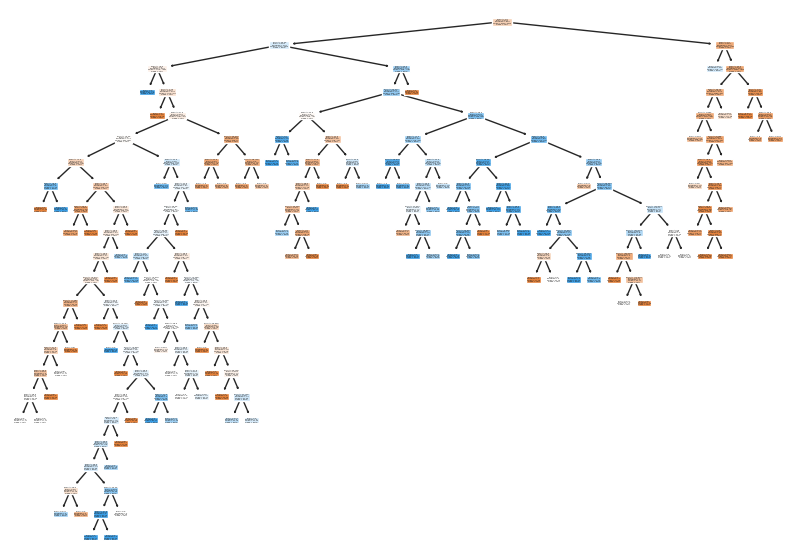

In [186]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Create and train a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_DT, Y_DT)
class_names_list = ['Age','Fare','Pclass']
from sklearn import tree
# clftree = tree.DecisionTreeClassifier(max_depth=3)
# clftree.fit(X_DT,Y_DT)
# clftree.predict(X_DT)

# Visualize the decision tree
plt.figure(figsize=(10, 7))
plot_tree(clf, filled=True, class_names=class_names_list)
# print(class_names_list)
plt.show()

In [189]:
y = pd.DataFrame(data=train_data, columns=train_data.columns)
# y['target'] = iris.target
X_d = train_data.drop(['Survived','Name','Ticket','Sex','Cabin','Embarked'], axis=1)  # Replace 'Survived' with your target column
y_d = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X_d, y_d, random_state=0)
print(X_train)
clf2 = DecisionTreeClassifier(random_state=0)
clf2.fit(X_train, y_train)
clf2.predict(X_train)


     PassengerId  Pclass    Age  SibSp  Parch      Fare
105          106       3  28.00      0      0    7.8958
68            69       3  17.00      4      2    7.9250
253          254       3  30.00      1      0   16.1000
320          321       3  22.00      0      0    7.2500
706          707       2  45.00      0      0   13.5000
271          272       3  25.00      0      0    0.0000
424          425       3  18.00      1      1   20.2125
752          753       3  33.00      0      0    9.5000
615          616       2  24.00      1      2   65.0000
2              3       3  26.00      0      0    7.9250
882          883       3  22.00      0      0   10.5167
467          468       1  56.00      0      0   26.5500
403          404       3  28.00      1      0   15.8500
258          259       1  35.00      0      0  512.3292
720          721       2   6.00      0      1   33.0000
272          273       2  41.00      0      1   19.5000
154          155       3    NaN      0      0   

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,

['Age', 'Fare']


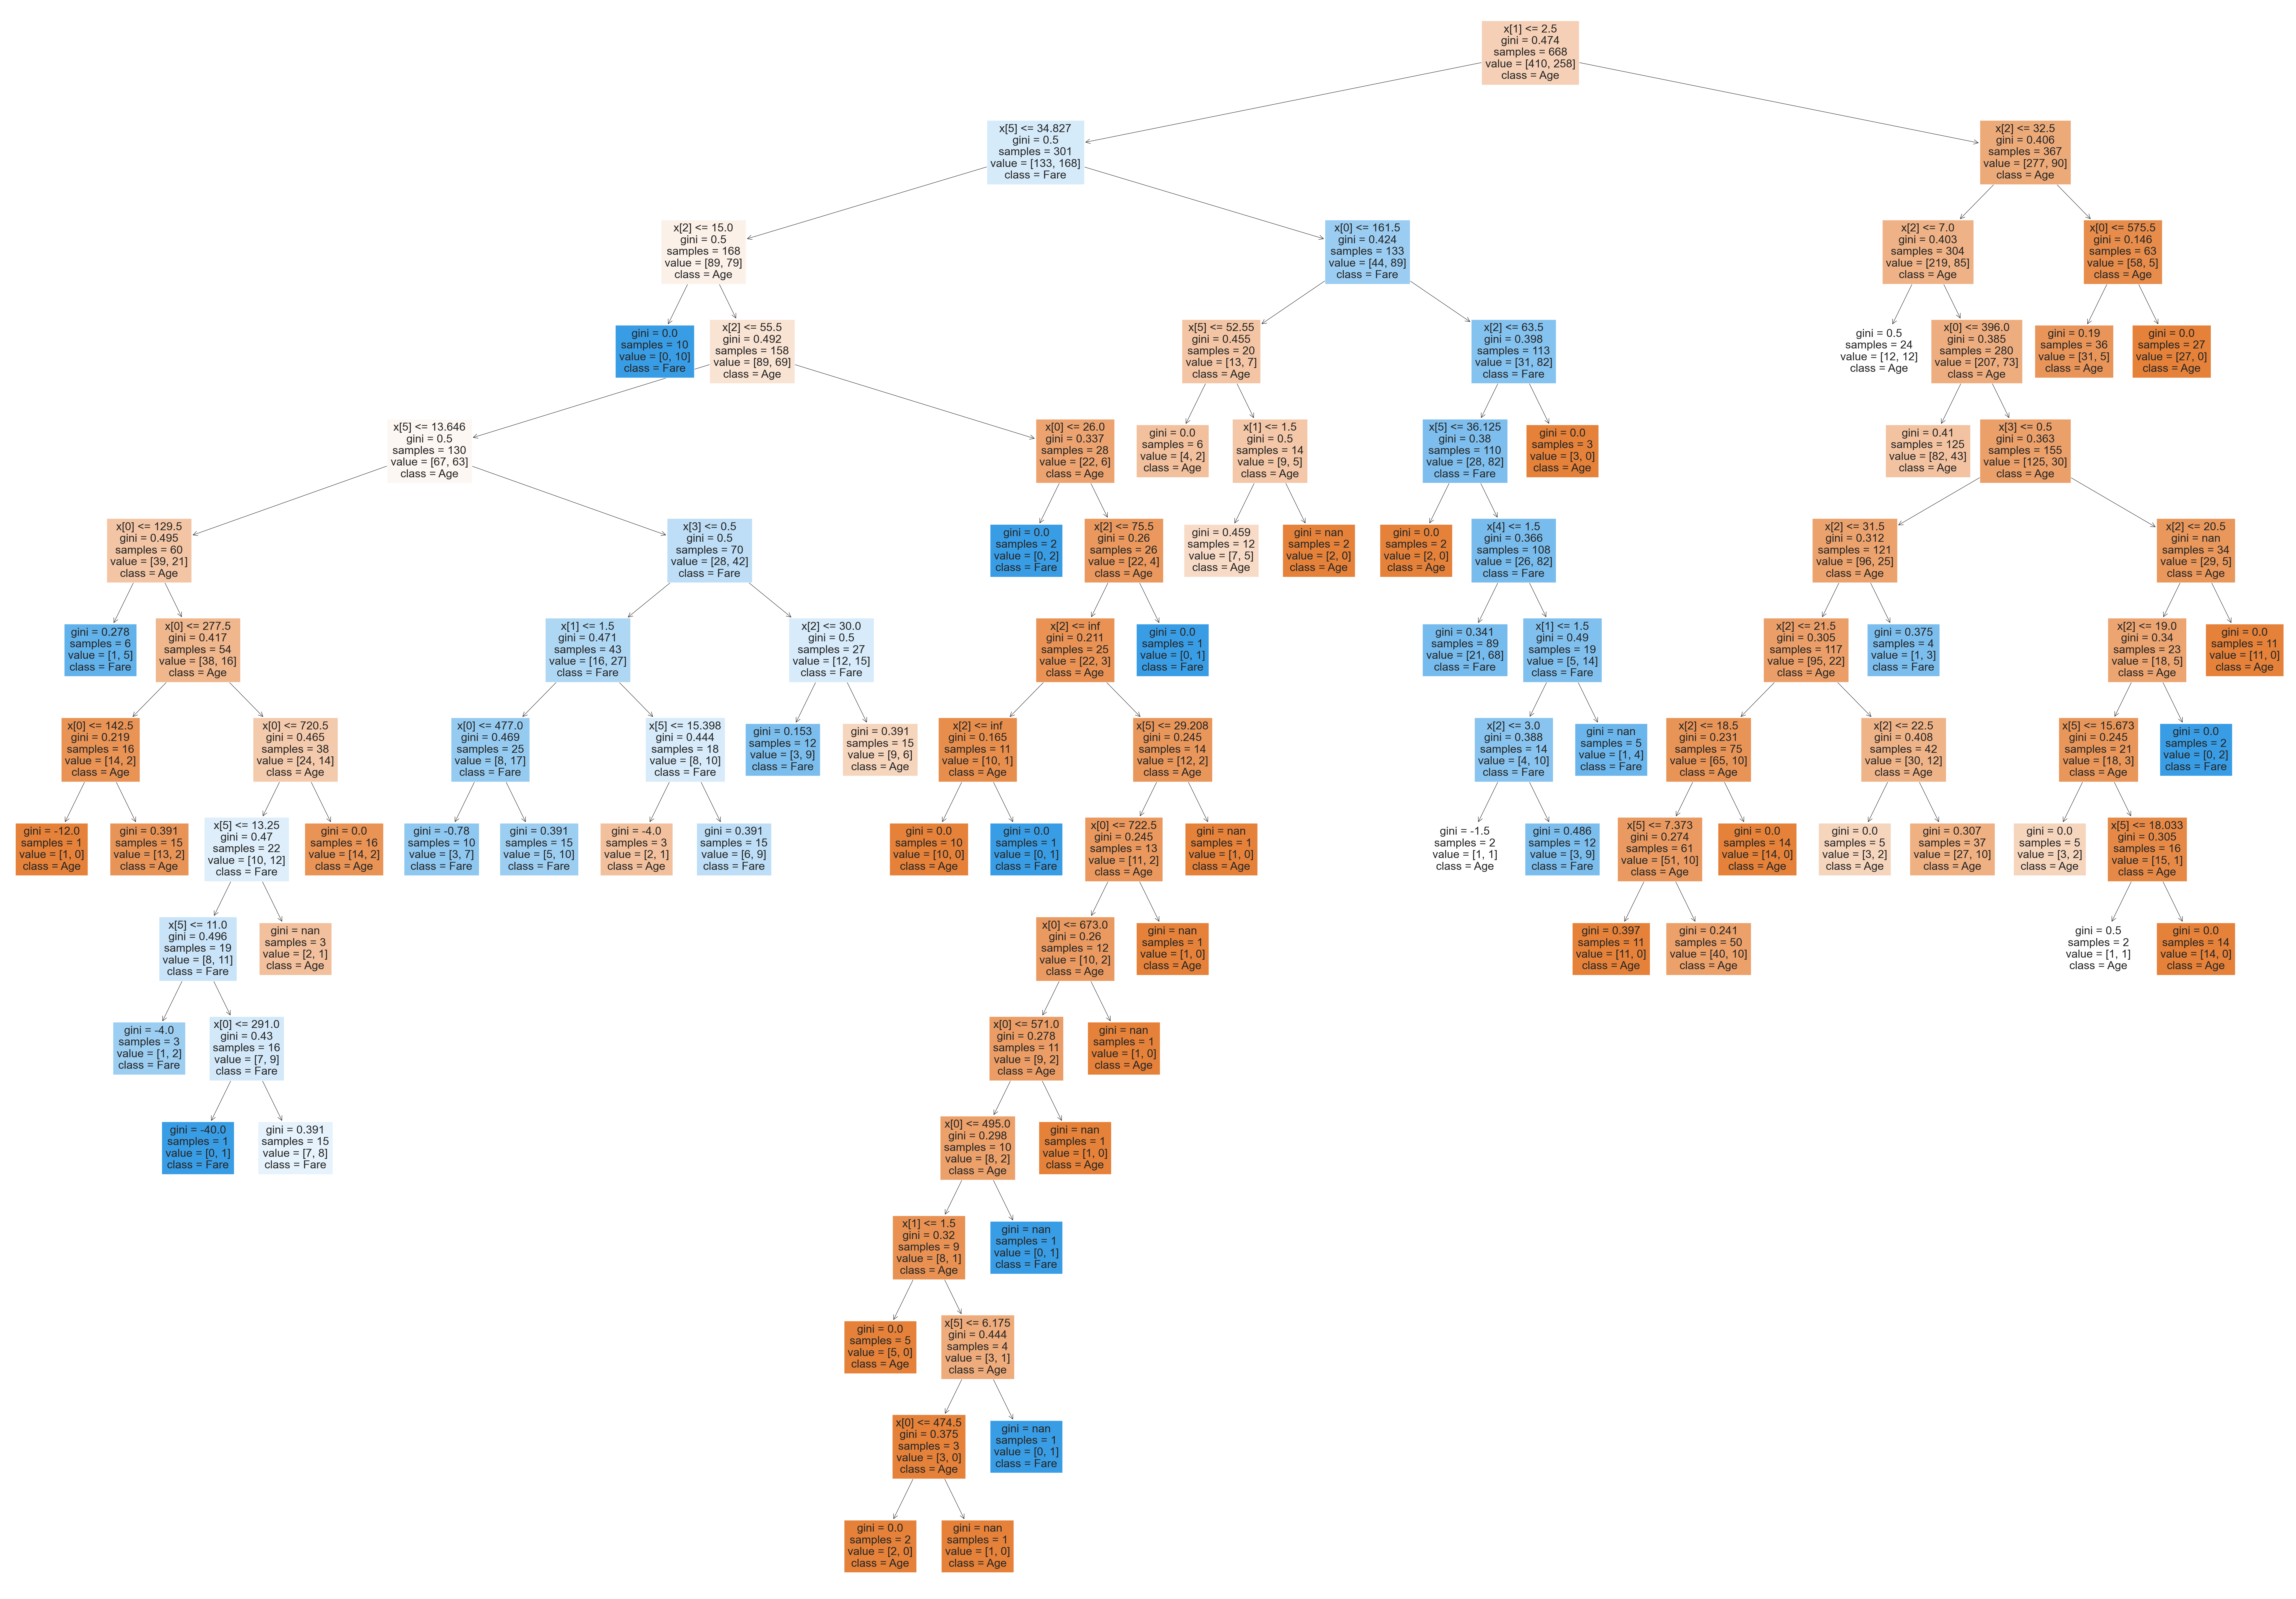

In [184]:
plt.figure(figsize=(100, 70))
class_list = ['Age','Fare']
plot_tree(clf2, filled=True,class_names=class_list)
print(class_list)
# print(class_names_list)
plt.show()

In [185]:
def train_using_gini(X_train, X_test, y_train):

    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion="gini",
                                      random_state=100, max_depth=3, min_samples_leaf=5)

    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini
